In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# 1.Basic Data Exploration

In [2]:
df.shape

(148654, 13)

In [3]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [4]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

# 2.Descriptive Statistics

In [14]:
statistics = df.describe()
#most frequent value in salary is 0 so it will be considered as internships 
salary_mode = df['TotalPay'].mode().iloc[0]
salary_median = df['TotalPay'].median()
salary_range = df['TotalPay'].max() - df['TotalPay'].min()
salary_mean = df['TotalPay'].mean()

print("Mode of Salary:", salary_mode)
print("Median of Salary:", salary_median)
print("Range of Salary:", salary_range)
print("Mean of Salary:", salary_mean)

Mode of Salary: 0.0
Median of Salary: 71425.84
Range of Salary: 568213.56
Mean of Salary: 74768.02350462828


# 3.Data Cleaning

In [6]:
# Find the indices of rows where 'EmployeeName' is 'Not Provided'
indices_to_drop = df[df['EmployeeName'] == 'Not Provided'].index

# Drop the rows corresponding to these indices from the DataFrame
df.drop(indices_to_drop, inplace=True)



Use Imputation to fill missing values

In [7]:

df['BasePay'] = df['BasePay'].fillna(df['BasePay'].median())
df['Benefits'] = df['Benefits'].fillna(df['Benefits'].median())
df['OvertimePay'] = df['OvertimePay'].fillna(df['OvertimePay'].median())
df['OtherPay'] = df['OtherPay'].fillna(df['OtherPay'].median())
df.drop(columns=['Status','Notes'], inplace=True)


#  4.Basic Data Visualization

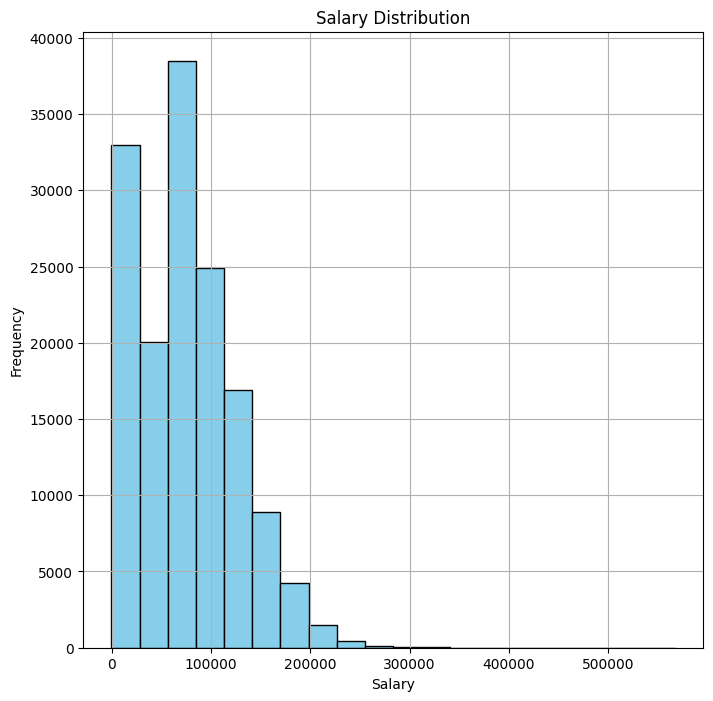

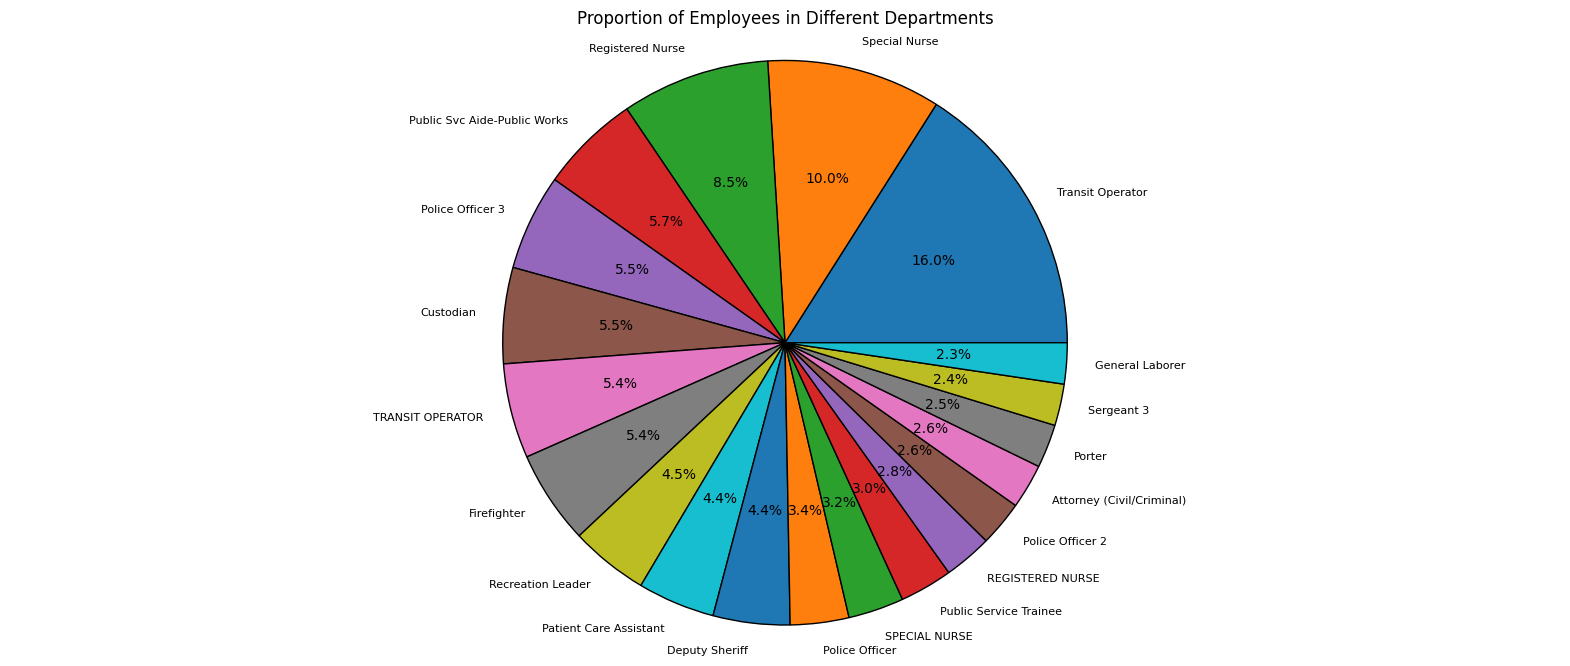

In [8]:

# Create histogram for salary distribution
plt.figure(figsize=(8, 8))
plt.hist(df['TotalPay'], bins=20, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create pie chart for department proportion

plt.figure(figsize=(20, 9))
department_counts = df['JobTitle'].value_counts().head(20)
pie = plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%',wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Proportion of Employees in Different Departments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Set font size of labels
plt.setp(pie[1], fontsize=8)

# Adjust space between the title and the pie chart
plt.subplots_adjust(top=0.8)

plt.show()

# 5.Grouped Analysis

In [9]:
# Compare the average salaries across different groups
average_salaries = df.groupby('JobTitle')['TotalPay'].mean()

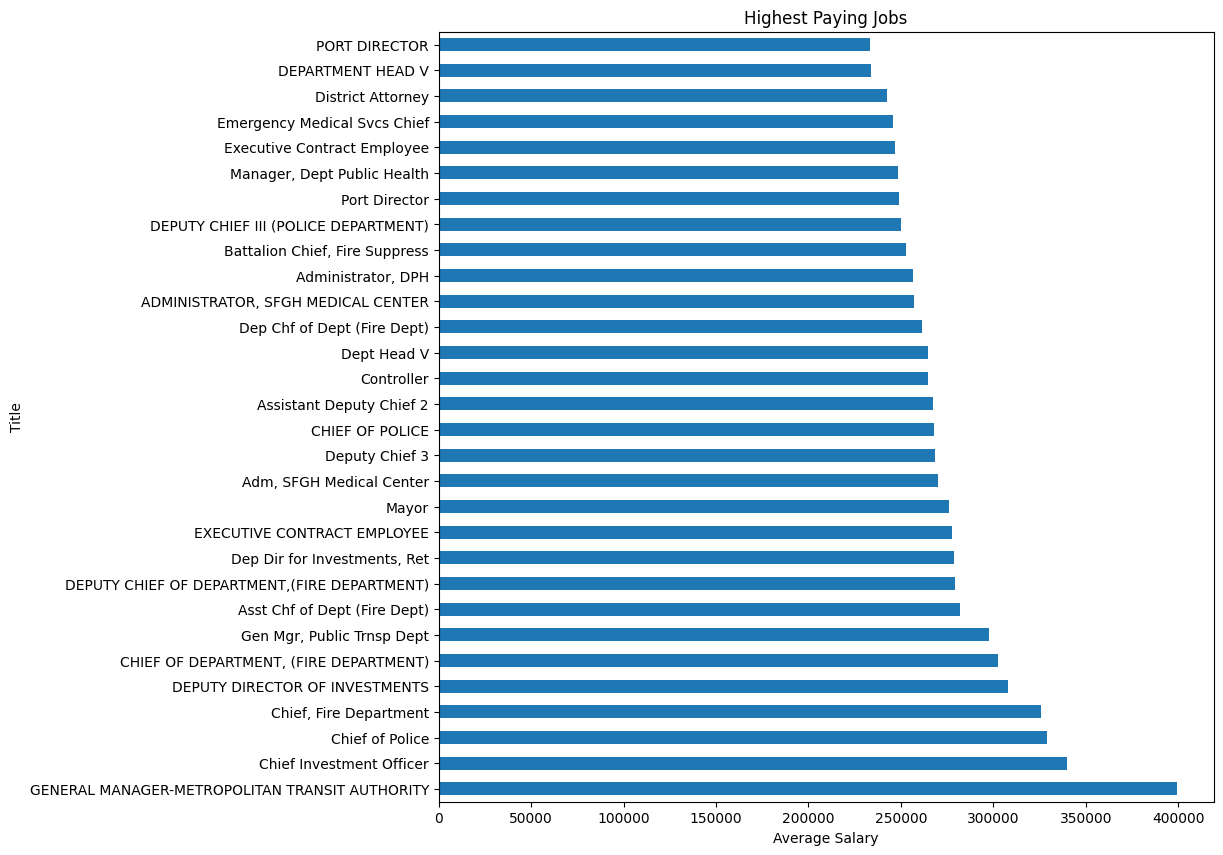

In [10]:
plt.figure(figsize=(10,10))
average_salaries.sort_values(ascending=False)[:30].plot(kind='barh')
plt.title('Highest Paying Jobs')
plt.xlabel('Average Salary')
plt.ylabel('Title')
plt.show()

# 6.Simple Correlation Analysis

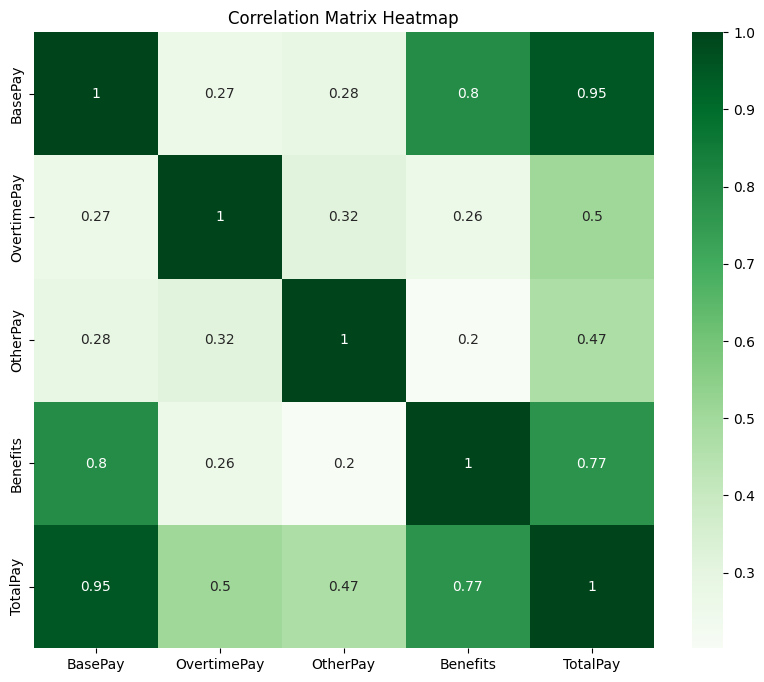

In [11]:
correlation_matrix = df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.title('Correlation Matrix Heatmap')
plt.show()

**As Shown** TotalPay and BasePay highly correlated.

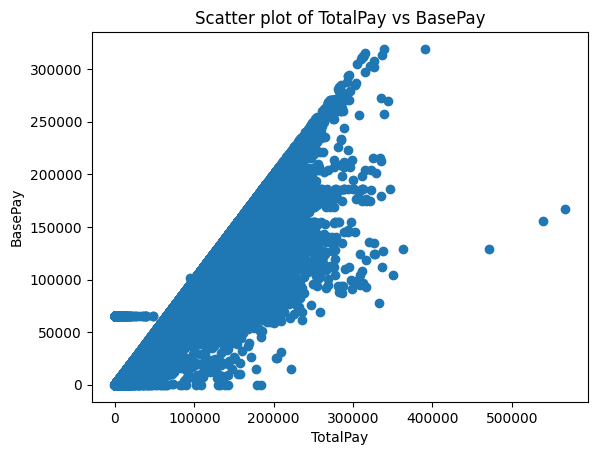

In [12]:
plt.scatter(df['TotalPay'], df['BasePay'])
plt.title('Scatter plot of TotalPay vs BasePay')
plt.xlabel('TotalPay')
plt.ylabel('BasePay')
plt.show()

# 7.Summary of Insights

 **1- Not provided employee names** also have no provided job titles.hence,We can drop these data.
 
 **2- CEO has highest salary** which is convincing.
 
 **3- Some job titles have no salaries** they will be considered as interships.
 
 **4- BasePay and Benefits** parameters play crucial role in the data set.
 
 **5- Some employee have negative salaries** we can consider it deduction from salary or non accurate data.